In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#from geopy.distance import great_circle
print('done')


done


In [3]:
from geopy.distance import great_circle

In [9]:
pip install geopy

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e1/58/9289c6a03116025cdb61461d99b2493daa4967a80b13755463d71a0affeb/geopy-2.4.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 125.4/125.4 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load your dataset
data = pd.read_csv('uber.csv')

# Check for and drop rows with missing or invalid coordinates
data = data.dropna(subset=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])
data = data[(data['pickup_latitude'] >= -90) & (data['pickup_latitude'] <= 90)]
data = data[(data['pickup_longitude'] >= -180) & (data['pickup_longitude'] <= 180)]
data = data[(data['dropoff_latitude'] >= -90) & (data['dropoff_latitude'] <= 90)]
data = data[(data['dropoff_longitude'] >= -180) & (data['dropoff_longitude'] <= 180)]


In [5]:
# Calculate the distance for each row and create a new column 'distance'
data['distance'] = data.apply(lambda row: great_circle(
    (row['pickup_latitude'], row['pickup_longitude']),
    (row['dropoff_latitude'], row['dropoff_longitude'])).miles, axis=1)

# Save the updated DataFrame to a new CSV file
# Replace 'updated_dataset.csv' with the desired file name
data.to_csv('uber.csv', index=False)

In [7]:
# Step 1: Pre-process the dataset
# Assume you have columns like 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'distance', and 'price'.

# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical features if necessary
# You may need to convert categorical variables into numerical format using techniques like one-hot encoding.

In [8]:
# Split the dataset into features (X) and target (y)
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'distance']]
y = data['fare_amount']

In [10]:
# Step 2: Identify outliers
# You can use different methods like z-score or IQR to detect outliers.
from scipy import stats
z_scores = np.abs(stats.zscore(data['distance']))
outliers = (z_scores > 3)
data = data[~outliers]
# Step 3: Check the correlation
#correlation_matrix = data.corr()
#print(correlation_matrix)


In [11]:
# Step 4: Implement linear regression, Ridge, and Lasso regression models
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Initialize the models
linear_reg_model = LinearRegression()
ridge_model = Ridge(alpha=100)  # You can adjust the alpha parameter
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha parameter

In [14]:
# Train the models
linear_reg_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)


Lasso(alpha=0.01)

In [15]:
# Step 5: Evaluate the models and compare their respective scores
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return r2, rmse
linear_reg_r2, linear_reg_rmse = evaluate_model(linear_reg_model, X_test_scaled, y_test)
ridge_r2, ridge_rmse = evaluate_model(ridge_model, X_test_scaled, y_test)
lasso_r2, lasso_rmse = evaluate_model(lasso_model, X_test_scaled, y_test)
print("Linear Regression R2 Score:", linear_reg_r2)
print("Linear Regression RMSE:", linear_reg_rmse)
print("Ridge Regression R2 Score:", ridge_r2)
print("Ridge Regression RMSE:", ridge_rmse)
print("Lasso Regression R2 Score:", lasso_r2)
print("Lasso Regression RMSE:", lasso_rmse)

Linear Regression R2 Score: 0.0006381141889498787
Linear Regression RMSE: 9.576268794382056
Ridge Regression R2 Score: 0.0006415603612498488
Ridge Regression RMSE: 9.576252283095616
Lasso Regression R2 Score: 0.0006315091164006414
Lasso Regression RMSE: 9.576300440498704


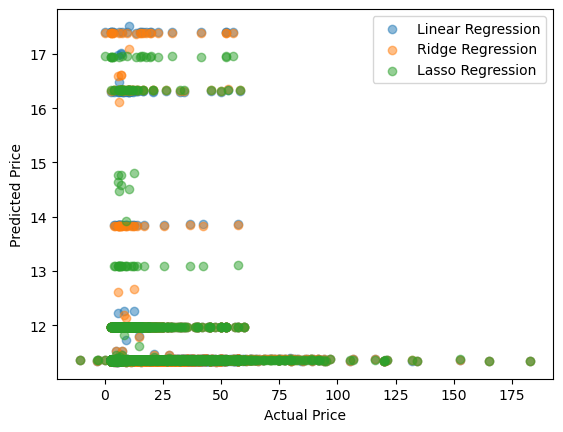

In [16]:
# For example, you can create scatter plots of actual vs. predicted prices.
plt.scatter(y_test, linear_reg_model.predict(X_test_scaled), label='Linear Regression', alpha=0.5)
plt.scatter(y_test, ridge_model.predict(X_test_scaled), label='Ridge Regression', alpha=0.5)
plt.scatter(y_test, lasso_model.predict(X_test_scaled), label='Lasso Regression', alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()
